In [ ]:
'''Questions to answer.
1) Total goal scored by team in all the seasons.
2) In which season the team scored most goal and least goal.
3) Is in knockout_match, there are more goal instead of non-knockout_match.
4) With which power of shot, maximum goal are done.
'''

In [2]:
#importing all the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Reading the data
yds_data = pd.read_csv('yds_data.csv')
yds_data.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [23]:
yds_data.shape

(30697, 27)

In [4]:
yds_data.dtypes

Unnamed: 0                 int64
match_event_id           float64
location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
game_season               object
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot              object
shot_basics               object
range_of_shot             object
team_name                 object
date_of_game              object
home/away                 object
shot_id_number           float64
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
match_id                   int64
team_id                    int64
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
dtype: object

In [11]:
yds_data.drop('Unnamed: 0',inplace = True, axis = 1 )

KeyError: "['Unnamed: 0'] not found in axis"

In [12]:
yds_data.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [13]:
yds_data.dtypes

match_event_id           float64
location_x               float64
location_y               float64
remaining_min            float64
power_of_shot            float64
knockout_match           float64
game_season               object
remaining_sec            float64
distance_of_shot         float64
is_goal                  float64
area_of_shot              object
shot_basics               object
range_of_shot             object
team_name                 object
date_of_game              object
home/away                 object
shot_id_number           float64
lat/lng                   object
type_of_shot              object
type_of_combined_shot     object
match_id                   int64
team_id                    int64
remaining_min.1          float64
power_of_shot.1          float64
knockout_match.1         float64
remaining_sec.1          float64
distance_of_shot.1       float64
dtype: object

In [14]:
yds_data.describes()

AttributeError: 'DataFrame' object has no attribute 'describes'

In [15]:
yds_data.describe()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


'''There are missing value are presents in many columns like match_event_id, location_x etc'''

In [17]:
columns=yds_data.dtypes[yds_data.dtypes=='object'].index #filtering columns which are object data type

In [19]:
yds_data[columns].describe()

,game_season,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,lat/lng,type_of_shot,type_of_combined_shot
count,24835,29195,29122,29133,29162,29147,29200,29132,15417,15280
unique,20,6,7,5,1,1558,74,38,57,6
top,2005-06,Center(C),Mid Range,Less Than 8 ft.,Manchester United,2016-04-13,MANU @ SAS,"42.982923, -71.446094",shot - 39,shot - 3
freq,1911,12761,11955,8933,29162,49,971,14171,1445,11685


'''There are also missing value in these columns '''

In [21]:
(yds_data.isnull().sum()/len(yds_data))*100

match_event_id            5.091703
location_x                4.759423
location_y                5.016777
remaining_min             5.088445
power_of_shot             4.840864
knockout_match            4.941851
game_season              19.096329
remaining_sec             5.192690
distance_of_shot          5.104733
is_goal                  20.418933
area_of_shot              4.892986
shot_basics               5.130795
range_of_shot             5.094960
team_name                 5.000489
date_of_game              5.049353
home/away                 4.876698
shot_id_number            5.091703
lat/lng                   5.098218
type_of_shot             49.776851
type_of_combined_shot    50.223149
match_id                  0.000000
team_id                   0.000000
remaining_min.1           5.000489
power_of_shot.1           5.013519
knockout_match.1          4.863667
remaining_sec.1           5.013519
distance_of_shot.1        5.107991
dtype: float64

In [ ]:
'''Here type_of_shot and type_of_combined_shot have about 50% data missing. So these columns have no use.
We have to drop them.'''

In [24]:
columns = ['type_of_shot','type_of_combined_shot']

In [25]:
yds_data.drop(columns,inplace = True, axis = 1)

In [28]:
#looking at what columns are not significant for model training
yds_data.nunique()

match_event_id          618
location_x              488
location_y              450
remaining_min            12
power_of_shot             7
knockout_match            2
game_season              20
remaining_sec            60
distance_of_shot         73
is_goal                   2
area_of_shot              6
shot_basics               7
range_of_shot             5
team_name                 1
date_of_game           1558
home/away                74
shot_id_number        29134
lat/lng                  38
match_id               1559
team_id                   1
remaining_min.1         291
power_of_shot.1         206
knockout_match.1        382
remaining_sec.1         354
distance_of_shot.1      271
dtype: int64

In [ ]:
'''Here team_name,team_id,team_name has one unique value. So there is no need of these columns.
Also shot_id_number,match_id,match_event_id are also of no use in prediction. Date_of_game is also not important'''

In [94]:
yds_data.drop('date_of_game',inplace = True, axis = 1)

In [29]:
columns = ['team_name','team_id']
yds_data.drop(columns,inplace = True, axis = 1)

In [30]:
columns = ['shot_id_number','match_id','match_event_id']
yds_data.drop(columns,inplace = True, axis = 1)

In [31]:
yds_data.dtypes

location_x            float64
location_y            float64
remaining_min         float64
power_of_shot         float64
knockout_match        float64
game_season            object
remaining_sec         float64
distance_of_shot      float64
is_goal               float64
area_of_shot           object
shot_basics            object
range_of_shot          object
date_of_game           object
home/away              object
lat/lng                object
remaining_min.1       float64
power_of_shot.1       float64
knockout_match.1      float64
remaining_sec.1       float64
distance_of_shot.1    float64
dtype: object

In [ ]:
'''finding the correlation between data, correlation tells us 
by how much a certain value will change based upon change in another value
1 means perfect positive correlation and -1 means perfect negative correlation'''

In [32]:
yds_data.corr()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
location_x,1.000000,-0.014907,0.007889,-0.028939,-0.012840,0.001631,0.023483,-0.004728,0.002110,-0.000150,0.005408,0.006466,0.004695
location_y,-0.014907,1.000000,-0.074579,0.041263,0.001962,-0.050964,0.818727,-0.145413,-0.010678,-0.000933,0.009672,-0.022644,0.323209
remaining_min,0.007889,-0.074579,1.000000,-0.043992,0.014806,0.026664,-0.058495,0.028342,0.098414,-0.004447,-0.010549,0.016655,-0.022925
power_of_shot,-0.028939,0.041263,-0.043992,1.000000,0.010686,0.003066,0.046184,-0.034698,-0.018268,0.026339,-0.003296,0.007004,0.023045
knockout_match,-0.012840,0.001962,0.014806,0.010686,1.000000,-0.000886,-0.009546,0.001152,0.005961,0.001193,0.009470,-0.003515,0.000299
remaining_sec,0.001631,-0.050964,0.026664,0.003066,-0.000886,1.000000,-0.049875,0.028964,0.006628,0.002475,0.002258,0.464134,-0.018455
distance_of_shot,0.023483,0.818727,-0.058495,0.046184,-0.009546,-0.049875,1.000000,-0.198234,-0.006094,0.000784,0.006642,-0.025477,0.398123
is_goal,-0.004728,-0.145413,0.028342,-0.034698,0.001152,0.028964,-0.198234,1.000000,0.008384,-0.001363,-0.001224,0.012209,-0.075195
remaining_min.1,0.002110,-0.010678,0.098414,-0.018268,0.005961,0.006628,-0.006094,0.008384,1.000000,-0.000642,0.001780,0.019363,-0.012790
power_of_shot.1,-0.000150,-0.000933,-0.004447,0.026339,0.001193,0.002475,0.000784,-0.001363,-0.000642,1.000000,-0.006052,0.006970,0.002725


In [ ]:
'''location_y is strongly correlated with distance_of_shot with correlation of 0.818727. remaining_sec and remaining_sec.1 has correlation
of 0.464134 '''

In [33]:
yds_data.columns

Index(['location_x', 'location_y', 'remaining_min', 'power_of_shot',
       'knockout_match', 'game_season', 'remaining_sec', 'distance_of_shot',
       'is_goal', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'date_of_game', 'home/away', 'lat/lng', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

# Total goal scored by team in all the seasons.

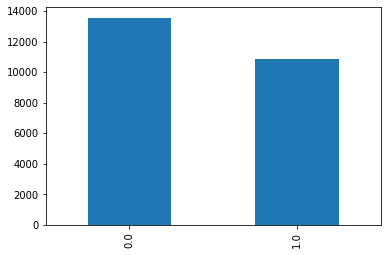

In [35]:
yds_data['is_goal'].value_counts().plot.bar()

In [55]:
yds_data['is_goal'].value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

In [ ]:
'''There are 10879 goals done by the team'''

In [36]:
yds_data['game_season'].value_counts()

2005-06    1911
2002-03    1823
2008-09    1810
2007-08    1733
2009-10    1665
2001-02    1632
2006-07    1537
2000-01    1488
2010-11    1462
2003-04    1329
2011-12    1326
2012-13    1296
1999-00    1264
2004-05    1074
2015-16     893
1997-98     804
1998-99     752
2014-15     594
1996-97     381
2013-14      61
Name: game_season, dtype: int64

# In which season the team scored most goal.

In [43]:
pd.crosstab(yds_data['game_season'],yds_data['is_goal'])

is_goal,0.0,1.0
game_season,,
1996-97,168,123
1997-98,361,266
1998-99,314,276
1999-00,542,450
2000-01,637,558
2001-02,693,617
2002-03,804,625
2003-04,587,460
2004-05,488,383


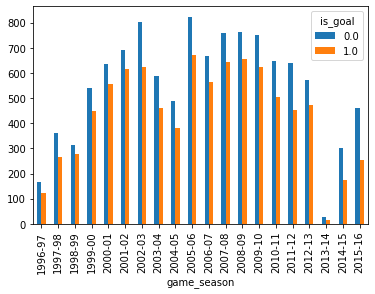

In [42]:
pd.crosstab(yds_data['game_season'],yds_data['is_goal']).plot.bar()

In [ ]:
'''The most goal is done by team in the season 2005-06 that is 673
 and least goal is in season 2013-14 that is 17'''

In [54]:
pd.crosstab(yds_data['lat/lng'],yds_data['is_goal'])

is_goal,0.0,1.0
lat/lng,,
"25.790710, -80.207819",122,96
"28.549237, -81.372780",174,132
"29.444994, -98.524120",433,338
"29.740325, -95.365762",360,246
"30.018061, -90.022651",123,91
"30.028164, -89.997933",54,40
"30.055498, -89.960838",40,23
"32.757824, -96.786653",275,210
"33.513157, -112.082793",18,8


In [57]:
yds_data.nunique()

location_x             488
location_y             450
remaining_min           12
power_of_shot            7
knockout_match           2
game_season             20
remaining_sec           60
distance_of_shot        73
is_goal                  2
area_of_shot             6
shot_basics              7
range_of_shot            5
date_of_game          1558
home/away               74
lat/lng                 38
remaining_min.1        291
power_of_shot.1        206
knockout_match.1       382
remaining_sec.1        354
distance_of_shot.1     271
dtype: int64

# Is in knockout_match, there are more goal instead of non-knockout_match?

In [60]:
pd.crosstab(yds_data['knockout_match'],yds_data['is_goal'])

is_goal,0.0,1.0
knockout_match,,
0.0,11025,8809
1.0,1875,1508


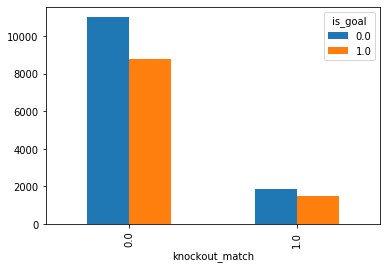

In [59]:
pd.crosstab(yds_data['knockout_match'],yds_data['is_goal']).plot.bar()

In [73]:
x=len(yds_data[yds_data['knockout_match']==0.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['knockout_match']==0.0][yds_data['is_goal']==0.0])
(x/(x+y))*100

44.41363315518806

In [74]:
x=len(yds_data[yds_data['knockout_match']==1.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['knockout_match']==1.0][yds_data['is_goal']==0.0])
(x/(x+y))*100

44.57582027785989

In [ ]:
'''There are more more no. of knockout_matches present. There is almost same success rate in knock_out
and non-knockout match. '''

# With which power of shot, maximum goal are done?

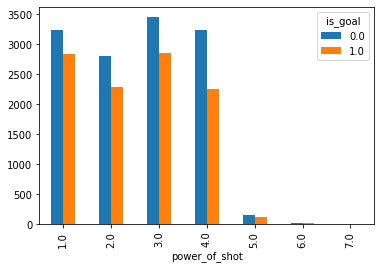

In [93]:
pd.crosstab(yds_data['power_of_shot'],yds_data['is_goal']).plot.bar()

In [ ]:
'''power_of_shot 1 and 3 has score more goal. Infact, power_of_shot 1,2,3,4 hit more goal instead of 5,6 and 7
   .'''

In [80]:
x=len(yds_data[yds_data['power_of_shot']==1.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['power_of_shot']==1.0][yds_data['is_goal']==0.0])
x1 = (x/(x+y))*100

In [84]:
x=len(yds_data[yds_data['power_of_shot']==2.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['power_of_shot']==2.0][yds_data['is_goal']==0.0])
x2 = (x/(x+y))*100

In [83]:
x=len(yds_data[yds_data['power_of_shot']==3.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['power_of_shot']==3.0][yds_data['is_goal']==0.0])
x3 = (x/(x+y))*100

In [85]:
x=len(yds_data[yds_data['power_of_shot']==4.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['power_of_shot']==4.0][yds_data['is_goal']==0.0])
x4 = (x/(x+y))*100

In [86]:
x=len(yds_data[yds_data['power_of_shot']==5.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['power_of_shot']==5.0][yds_data['is_goal']==0.0])
x5 = (x/(x+y))*100

In [87]:
x=len(yds_data[yds_data['power_of_shot']==6.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['power_of_shot']==6.0][yds_data['is_goal']==0.0])
x6 = (x/(x+y))*100

In [88]:
x=len(yds_data[yds_data['power_of_shot']==7.0][yds_data['is_goal']==1.0])
y=len(yds_data[yds_data['power_of_shot']==7.0][yds_data['is_goal']==0.0])
x7 = (x/(x+y))*100

In [89]:
x1,x2,x3,x4,x5,x6,x7 #success rate is almost same.

(46.58641160949868,
 44.85062893081761,
 45.290199809705044,
 41.06165632980664,
 44.31372549019608,
 40.74074074074074,
 42.857142857142854)

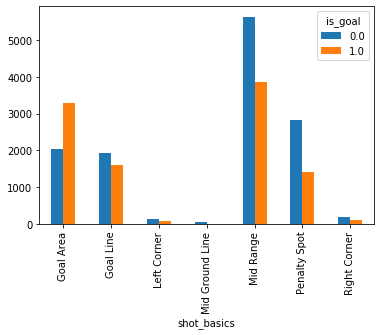

In [98]:
pd.crosstab(yds_data['shot_basics'],yds_data['is_goal']).plot.bar() #Mid range shot_basic has more shot

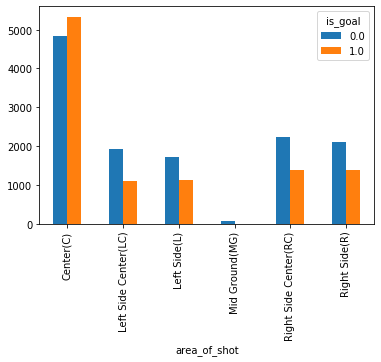

In [99]:
pd.crosstab(yds_data['area_of_shot'],yds_data['is_goal']).plot.bar() #There are more goal from Center 
# and less goal from Mid Ground(MG)

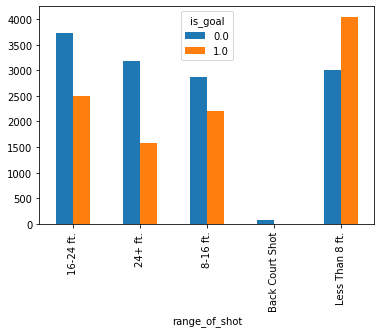

In [100]:
pd.crosstab(yds_data['range_of_shot'],yds_data['is_goal']).plot.bar() #More goal are scored from less than 8 fit.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2148e3390>,
      dtype=object)

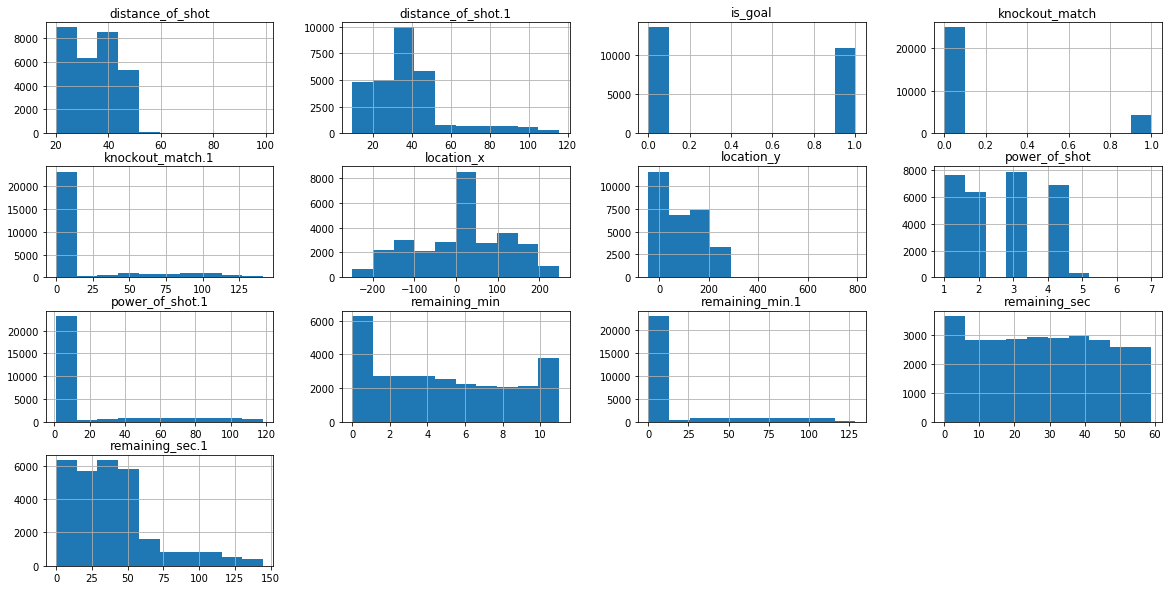

In [103]:
yds_data.hist(figsize = (20,10))

In [ ]:
'''remaining_sec.1 is about in range 0 to 50, remaining_sec is about 0 to 55.
   remaining_min is 0 t0 10 and remaining_min.1 is 0 to 12
   We should combine these columns.'''

In [105]:
yds_data['rem_sec'] = yds_data['remaining_min']*60+yds_data['remaining_sec']

In [106]:
yds_data['rem_sec.1'] = yds_data['remaining_min.1']*60+yds_data['remaining_sec.1']

In [108]:
yds_data.dtypes

location_x            float64
location_y            float64
remaining_min         float64
power_of_shot         float64
knockout_match        float64
game_season            object
remaining_sec         float64
distance_of_shot      float64
is_goal               float64
area_of_shot           object
shot_basics            object
range_of_shot          object
home/away              object
lat/lng                object
remaining_min.1       float64
power_of_shot.1       float64
knockout_match.1      float64
remaining_sec.1       float64
distance_of_shot.1    float64
rem_sec               float64
rem_sec.1             float64
dtype: object

In [109]:
#Now these columns has no use.
columns = ['remaining_sec','remaining_min','remaining_min.1','remaining_sec.1']
yds_data.drop(columns,inplace = True, axis = 1)

In [110]:
yds_data.dtypes

location_x            float64
location_y            float64
power_of_shot         float64
knockout_match        float64
game_season            object
distance_of_shot      float64
is_goal               float64
area_of_shot           object
shot_basics            object
range_of_shot          object
home/away              object
lat/lng                object
power_of_shot.1       float64
knockout_match.1      float64
distance_of_shot.1    float64
rem_sec               float64
rem_sec.1             float64
dtype: object

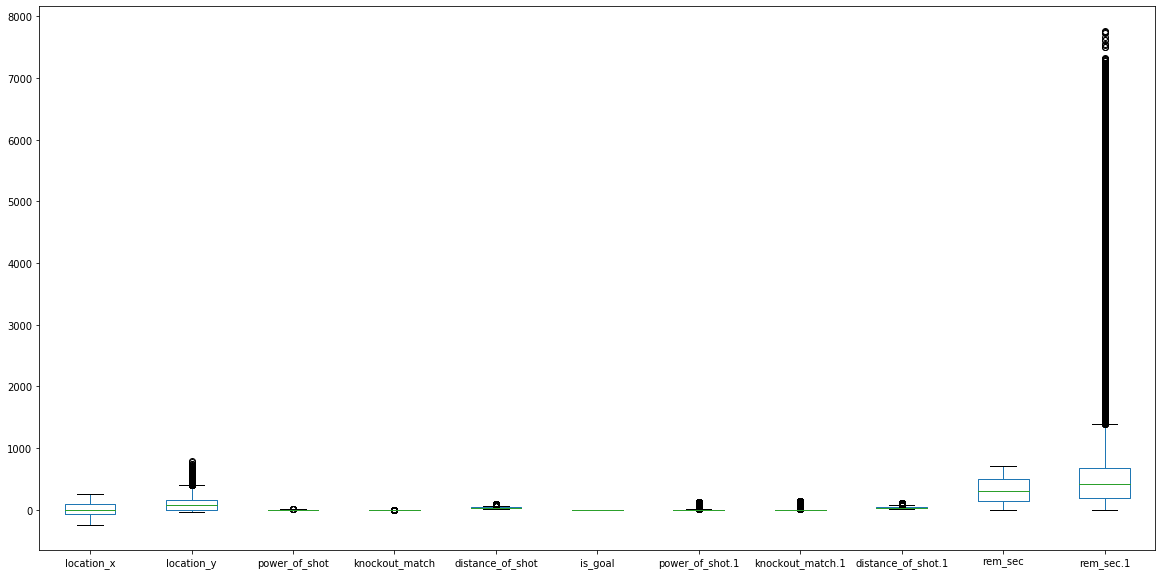

In [112]:
yds_data.plot.box(figsize = (20,10))

In [ ]:
#There are outlier present in the data.